## Library settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [75]:

#!unzip "/content/drive/MyDrive/Perceptual_hashing/datasetGenerated/facebook.zip" -d "/content/"

#print(pytorch_lightning.__version__)
#!pip install pytorch==1.9.0
#!pip install pytorch_lightning==1.4.5
#!pip install pytorch_lightning==1.5.7
#!pip install pytorch_lightning
#!pip install torchvision
#!pip install opencv-python
#!conda activate
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
#!pip install scikit-image
#!pip install matplotlib

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import os
import glob

import time
from skimage import io


import numpy as np

import torch
from torch import nn
from torch import optim

from torchvision import datasets, transforms, models
import torchvision.utils as vutils
from torch.utils.data import Dataset
from torch.utils.data import (
    Dataset,
    DataLoader,
)

#from comprissionFunc import comprissionF
import random

import cv2
from PIL import Image

c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch.nn.functional as F

from torchvision.datasets import ImageFolder
from torchvision.transforms import (
    RandomResizedCrop,
    RandomHorizontalFlip,
    ColorJitter,
    RandomGrayscale,
    RandomApply,
    Compose,
    GaussianBlur,
    ToTensor,
    Lambda,
    Normalize,
    Resize,
    RandomAffine,
    InterpolationMode,
    functional,
    RandomResizedCrop
)

In [3]:
#torch.__version__

import pytorch_lightning as pl


In [4]:
!nvidia-smi

Tue Jan 31 11:46:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.06       Driver Version: 522.06       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   37C    P8    12W / 350W |   3086MiB / 24576MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#torch.cuda.reset_accumulated_memory_stats()

In [14]:
import torch
torch.tensor([0,1],device="cuda")

tensor([0, 1], device='cuda:0')

In [15]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'DEVICE: {DEVICE}')

DEVICE: cuda


## Preprocessing

In [16]:
#data_dir = "C:/Users/mo894398/Desktop/dataset/imageNet_test_100K/content/imageNet_test/*"
#data_dir = "C:/Users/mo894398/Desktop/dataset/dataset_842662_v2/content/content/content/holopix50k/scripts/Holopix50k/train/left/*"
data_dir = "C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region/*"

In [123]:
import pandas as pd

paths_to_fix = glob.glob(data_dir)
list_to_cvs = []

for path in paths_to_fix:
    
    bath_name = os.path.basename(path)
    try:
        split1 = os.path.splitext(bath_name)[0].split("region")
        dataa = split1[0].split(" ")[0]
        city = split1[0].split(dataa)[1]
        descreption = split1[1]
    
    
        list_to_cvs.append([dataa, city, descreption])
    except:
        continue


df = pd.DataFrame(list_to_cvs, columns=['date', 'city', 'descreption'])
df.to_csv('UkrainRoad.csv', index=False)

C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Demydiv Kyiv region Zoo where active battles with Russian troops were held, also injured,Some animals died 1.jpg
C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Demydiv Kyiv region Zoo where active battles with Russian troops were held, also injured,Some animals died 2.jpg
C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Demydiv Kyiv region Zoo where active battles with Russian troops were held, also injured,Some animals died 3.jpg
C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Hostomel Kyiv region  burned the largest transport aircraft MRIYA.jpg
C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Hostomel Kyiv region Airfield Antonov bombed, aircrafts damaged, devastated residential areas 1.jpg
C:/Users/mo894398/Desktop/dataset/Ukrainwar_dataset_region\APR01 Hostomel Kyiv region Airfield Antonov bombed, aircrafts damaged, devastated residential areas 2.jpg
C

In [124]:
df

,date,city,descreption
0,APR01,Demydiv Kyiv,Zoo where active battles with Russian troops ...
1,APR01,Demydiv Kyiv,Zoo where active battles with Russian troops ...
2,APR01,Demydiv Kyiv,Zoo where active battles with Russian troops ...
3,APR01,Hostomel Kyiv,burned the largest transport aircraft MRIYA
4,APR01,Hostomel Kyiv,"Airfield Antonov bombed, aircrafts damaged, d..."
...,...,...,...
19951,SEP30,Izium Kharkiv,Law enforcement officers record war crimes a ...
19952,SEP30,Izium Kharkiv,Law enforcement officers record war crimes a ...
19953,SEP30,Izium Kharkiv,Law enforcement officers record war crimes a ...
19954,SEP30,Izium Kharkiv,Law enforcement officers record war crimes a ...


In [149]:

city_events = df['city'].value_counts()
print(city_events)



 Donetsk                         3143
 Bakhmut Donetsk                  973
 Zaporizhzhia                     623
 Luhansk                          618
 Mykolaiv                         591
                                 ... 
 Horlivka Donetsk                   1
 Behy Zhytomyr                      1
 Velyka Kamyshevakha Kharkiv        1
 Hatne village Kyiv                 1
 Pryvillia Luhansk                  1
Name: city, Length: 903, dtype: int64


In [73]:
paths_to_fix = glob.glob(data_dir)
pathslink = []

for path in paths_to_fix:
   try:
     imagff = Image.open(path)
   except IOError:
      pathslink.append(path)



In [17]:
splic_dir = "C:/Users/mo894398/Desktop/dataset/croppedFiles/croppedOutput/*"
paths = glob.glob(splic_dir)

In [18]:
import cv2 as cv
path = "C:/Users/mo894398/Desktop/dataset/compressed/"
def randomJPEGcompression(image):
    xlist = [5, 10, 20, 30, 40 , 50, 60, 70, 80, 90, 100]
    rand = random.choice(xlist)
    #rand = random.uniform(20 , 80)
    img=image.convert('RGB')
    img.save(path+"Compressed.jpg", "JPEG", optimize = True, quality = rand)
    picture2 = Image.open(path+"Compressed.jpg")
    img2=picture2.convert('RGB')

    #image1= comprissionF(image)
    return img2

from PIL import Image, ImageFilter
import random
import os

def removal(im):
  
  img = np.array(im)
  copy = img

  width, height, c = copy.shape
  margin=32
          
      # Setting the points for cropped image
  left = random.randint(0, (width - margin))  # 389
  top = random.randint(0, (height - margin))  # 15
  right = random.randint((left+margin), width)  # 389 , 640 = 389
  bottom = random.randint((top+margin), height)
  #right = random.randint((left + margin), width)  # 389 , 640 = 389
  #bottom = random.randint((top + margin), height)  # 15 , 360 = 115

  im1 = copy[left:right, top:bottom]

  #im1 = copy.crop((left+margin, top+margin, right+margin, bottom+margin))

  img1 = im1 * 0 + 255
  img1=Image.fromarray(img1)
  w , h = img1.size

  copy = copy * 0

  p1 = random.randint(0, (width-margin))
  p2 = random.randint(0, (height-margin))

  #blended = cv.addWeighted(copy, 0.5, img1, 0.5, 0)
  pil_image=Image.fromarray(copy)

  pil_image.paste(img1, (left, top))

  np_array = np.array(pil_image)

  #img[top:bottom, left:right]= 0
  #mask = cv.imread('mask2.png',0)
  dst = cv.inpaint(img,np_array[:,:,0],3,cv.INPAINT_TELEA)

  image = Image.fromarray(dst)
    
  return image 

def copymove(im):

    im_tmp=im.copy()
    width, height = im.size
    margin=32
    
    # Setting the points for cropped image
    left = random.randint(0, (width - margin))  # 389
    top = random.randint(0, (height - margin))  # 15
    right = random.randint((left + margin), width)  # 389 , 640 = 389
    bottom = random.randint((top + margin), height)  # 15 , 360 = 115

    im1 = im.crop((left+margin, top+margin, right+margin, bottom+margin))
    
    w1, h1 = im1.size
    #im1 = im1.resize((8, 8)) 
    if w1 <= margin:
      im1 = im1.resize((margin, h1))   
    elif h1 <= margin:
      im1 = im1.resize((w1, margin)) 
    
    x, y = im.size
    p1 = random.randint(0, (width-margin))
    p2 = random.randint(0, (height-margin))
    #print (p1, " ", p2)
    #pil_image.paste(img1, (left, top))
    im_tmp.paste(im1, (p1, p2))
    #im_tmp.paste(im1, (random.randint(0, x), random.randint(0, y)))
    
    return im_tmp 

def splicing(im):
    im_tmp=im.copy()
    width, height = im.size
    #splic_dir = './../ImageAuthentication/COpycrop/*'
    #paths = glob.glob(splic_dir)
    path=random.choice(paths)
    im1 = Image.open(path)
    
    margin = 32
    w1, h1 = im1.size
    #im1 = im1.resize((8, 8)) 
    if w1 <= margin:
      im1 = im1.resize((margin, h1))   
    elif h1 <= margin:
      im1 = im1.resize((w1, margin)) 
    
    p1 = random.randint(0, (width-margin))
    p2 = random.randint(0, (height-margin))
    #print (p1, " ", p2)
    im_tmp.paste(im1, (p1, p2))

    return im_tmp 

In [140]:
path = "C:/Users/mo894398/Desktop/dataset/compressed/"
def randomJPEGcompression(image):
    xlist = [40 , 43, 50, 70, 90, 100]
    rand = random.choice(xlist)
    #rand = random.uniform(20 , 80)
    img=image.convert('RGB')
    img.save(path+"Compressed.jpg", "JPEG", optimize = True, quality = rand)
    picture2 = Image.open(path+"Compressed.jpg")
    img2=picture2.convert('RGB')

    #image1= comprissionF(image)
    return img2

from PIL import Image, ImageFilter
import random
import os

def removal(im):
    
    im_temp=im.copy()
    # Importing Image class from PIL module


    # Size of the image in pixels (size of original image)
    # (This is not mandatory)
    width, height = im_temp.size
    margin=32
        
    # Setting the points for cropped image
    left = random.randint(0, (width - margin))  # 389
    top = random.randint(0, (height - margin))  # 15
    right = random.randint((left + margin), width)  # 389 , 640 = 389
    bottom = random.randint((top + margin), height)  # 15 , 360 = 115

    im1 = im.crop((left+margin, top+margin, right+margin, bottom+margin))

    for i in range(50):  # You can blur many times

         im1 = im1.filter(ImageFilter.BLUR)
    
  
    
    p1 = random.randint(0, (width-64))
    p2 = random.randint(0, (height-64))
    #print (p1, " ", p2)
    im_temp.paste(im1, (p1, p2))

    #im_temp.paste(im1, (left, top, right, bottom))
    
    return im_temp 

def copymove(im):

    im_tmp=im.copy()
    width, height = im.size
    margin=64
    
    # Setting the points for cropped image
    left = random.randint(0, (width - margin))  # 389
    top = random.randint(0, (height - margin))  # 15
    right = random.randint((left + margin), width)  # 389 , 640 = 389
    bottom = random.randint((top + margin), height)  # 15 , 360 = 115

    im1 = im.crop((left+margin, top+margin, right+margin, bottom+margin))
    

    
    x, y = im.size
    p1 = random.randint(0, (width-64))
    p2 = random.randint(0, (height-64))
    #print (p1, " ", p2)
    im_tmp.paste(im1, (p1, p2))
    #im_tmp.paste(im1, (random.randint(0, x), random.randint(0, y)))
    
    return im_tmp 

def splicing(im):
    im_tmp=im.copy()
    width, height = im.size
    #splic_dir = './../ImageAuthentication/COpycrop/*'
    #paths = glob.glob(splic_dir)
    path=random.choice(paths)
    im1 = Image.open(path)
    

    
    p1 = random.randint(0, (width-64))
    p2 = random.randint(0, (height-64))
    #print (p1, " ", p2)
    im_tmp.paste(im1, (p1, p2))

    return im_tmp 

In [376]:
class ContrastiveAugmentation(object):
    """Take two random crops of one image as the query and key."""
    ## We need to add adversarial examples ...
    
    def __init__(self, out_shape,kernel_size,s=1, n_views=2):
        self.n_views = n_views
        
        color_jitter = ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
        #color_jitter = ColorJitter(0.05*s, 0.8*s, 0*s, 0*s)
        #color_jitter = ColorJitter(0.02*s, 0.2*s, 0.1*s, 0.1*s)

        #Gaussian 
        gaussian_blur = GaussianBlur(kernel_size=kernel_size)

        self.preprocess_aug =  Compose([ Lambda(randomJPEGcompression),
                                    ToTensor(),
                                    #Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                   ])
        
        self.preprocess=  Compose([ ToTensor(),
                            Resize(out_shape),
                            #Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                           ])

        #self.gama = functional.adjust_gamma

        self.Augmentation = Compose([
            
            #RandomResizedCrop(out_shape),
            Resize(out_shape),
            #RandomHorizontalFlip(p=0.5),
            RandomApply([color_jitter], p=0.5),
            #RandomGrayscale(p=0.2),
            RandomApply([gaussian_blur], p=0.2),
            #RandomAffine(degrees=0, interpolation=InterpolationMode.NEAREST, scale=(0.5, 1.2), fill=255),
            #RandomResizedCrop(size=out_shape, scale=(0.08, 1.2),interpolation=InterpolationMode.BILINEAR)
            
            
        ])
        
        self.alteration = Compose([Lambda(random.choice([removal,copymove,splicing]))])
        
        
        #self.alteration=
    def __call__(self,x):
        
        #image1 = [self.preprocess(x).unsqueeze(0) for i in range(32)]
        #image2 = [self.Augmentation(self.preprocess_aug(x)).unsqueeze(0) for i in range(2)]
        #alt_im = [self.Augmentation(self.preprocess_aug(self.alteration(x))).unsqueeze(0) for i in range(30)]
        
        image = self.preprocess(x).unsqueeze(0) 
        image_aug = self.Augmentation(self.preprocess(x)).unsqueeze(0) 
        image_alt = self.preprocess(self.alteration(x)).unsqueeze(0) 
        image_alt_aug = self.Augmentation(image_alt)
        return [ torch.cat([image,image_alt]) , torch.cat([image_aug,image_alt_aug]) ]

        #return [ torch.cat(image1) , torch.cat([torch.cat(image2),torch.cat(alt_im)]) ]


In [377]:
image_size=224
b_size=1

# 237 node
# 32 core
# 128 gb
class ImageLoadDataset(Dataset):
    """Image dataset."""

    def __init__(self, img_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.img_dir=img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        img_name = self.img_dir[idx]
        
        image=Image.open(img_name)
        #image = io.imread(img_name)
        if self.transform:
            image = self.transform(image)
            #print(self.img_dir)
        return image

In [378]:
import torchvision
# The size of the images
out_shape = [32,23224]
kernel_size = [3,3] # 10% of the output_shape


Augmentation=ContrastiveAugmentation(out_shape,kernel_size)
#dataloader = ImageLoadDataset(img_dir=glob.glob(data_dir),
#                           transform=Augmentation)
dataloader = ImageLoadDataset(torchvision.datasets.CIFAR100("./",
                                         train=True,
                                         download=True,
                                         transform=Augmentation))


print("DataLoader Length:",len(dataloader))

Files already downloaded and verified
DataLoader Length: 50000


In [379]:
class ImageDataSetLoader():
    def __init__(self,out_shape,kernel_size,data_dir):
        super().__init__()
        self.Augmentation=ContrastiveAugmentation(out_shape,kernel_size)
        self.data_dir=data_dir
        
    def forward(self):
        
        dataloader = ImageLoadDataset(img_dir=glob.glob(self.data_dir),
                           transform=self.Augmentation)
        num_train = len(dataloader)
        indices = list(range(num_train))
        #print(num_train)
        split = int(np.floor(0.15 * num_train))
        np.random.shuffle(indices)
        
        
        from torch.utils.data.sampler import SubsetRandomSampler
        train_idx, val_idx= indices[split:], indices[:split]

        train_sampler = SubsetRandomSampler(train_idx)
        val_sampler = SubsetRandomSampler(val_idx)

        return [dataloader,train_sampler,val_sampler]



## Visualization

In [255]:
for index, i in enumerate(dataloader):
    print(i[0].shape)
    print(i[1].shape)

    f, axarr = plt.subplots(1,2)
    fig = plt.gcf()
    #fig.set_size_inches(18.5, 10.5)
    fig.set_size_inches(16, 16)

    axarr[0].imshow(i[0][1].permute(1,2,0))
    axarr[1].imshow(i[1][1].permute(1,2,0))
    #32,3,224,224
    if index ==1:
      break

AttributeError: 'tuple' object has no attribute 'read'

### 

## Loss

In [283]:
class ContrastiveLoss(nn.Module):
    def __init__(self, batch_size=200, temperature=0.1):
        super().__init__()
        self.batch_size = batch_size
        self.register_buffer("temperature", torch.tensor(temperature))
        self.register_buffer("negatives_mask", (~torch.eye(batch_size * 2, batch_size * 2, dtype=bool)).float())
            
    def forward(self, emb_i, emb_j):
        """
        emb_i and emb_j are batches of embeddings, where corresponding indices are pairs
        z_i, z_j as per SimCLR paper
        """
        z_i = F.normalize(emb_i, dim=1)
        z_j = F.normalize(emb_j, dim=1)
        
        representations = torch.cat([z_i, z_j], dim=0)
        similarity_matrix = F.cosine_similarity(representations.unsqueeze(1), representations.unsqueeze(0), dim=2)
        
        sim_ij = torch.diag(similarity_matrix, self.batch_size)
        sim_ji = torch.diag(similarity_matrix, -self.batch_size)
        positives = torch.cat([sim_ij, sim_ji], dim=0)
        
        nominator = torch.exp(positives / self.temperature)
        denominator = self.negatives_mask.to(DEVICE) * torch.exp(similarity_matrix / self.temperature)
    
        loss_partial = -torch.log(nominator / torch.sum(denominator, dim=1))
        loss = torch.sum(loss_partial) / (2 * self.batch_size)
        return loss

## Model

In [380]:
#khaled
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

class SimCLR(nn.Module):
    def __init__(self, linear_eval=False,pretrained=False):
        super().__init__()
        
        self.linear_eval = linear_eval
        resnet18 = models.resnet18(pretrained=False)
        resnet18.fc = Identity()
        
        self.encoder = resnet18

        self.projection = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256,128),
        )
            
        
    def forward(self, x):
        encoding = self.encoder(x)    # 2048 vectors
        #encoding_pooled = self.adaptive_pooling(encoding)
        projection = self.projection(encoding)    # 32 vectors
        
        return projection,encoding


In [381]:
class SimCLR_Module(pl.LightningModule):
    def __init__(self,hyprams,file_path):
        hyprams=Namespace(**hyprams) if isinstance(hyprams,dict) else hyprams
        super().__init__()
        self.hyprams=hyprams
        self.simclr_model=SimCLR().to(DEVICE) #pretrained=True
        #self.loss=ContrastiveLoss(batch_size=16)
        #self.seed = torch.randn((32,32),device=DEVICE)
        self.loss=ContrastiveLoss()
        #self.loss=NT_Xent(16,0.5,1)
        
        # The size of the images
        out_shape = [32,32]
        #kernel_size = [21,21] # 10% of the output_shape
        kernal_size = [3,3]

        imgedataloader=ImageDataSetLoader(out_shape,kernel_size,data_dir=file_path)
        self.D_Loader=imgedataloader.forward()
        #print(len(self.D_Loader[0]))
        
        
        #self.seed = torch.rand((32,32),device=DEVICE)

    def total_steps(self):
        return len(self.train_dataloader())
    
    def train_dataloader(self):
        
        return  torch.utils.data.DataLoader(self.D_Loader[0],shuffle=False,
                       sampler=self.D_Loader[1], batch_size=self.hyprams.batch_size, drop_last=True)

    def val_dataloader(self):
        ## Be careful the sampler should not be the same as training !
        return torch.utils.data.DataLoader(self.D_Loader[0],shuffle=False,
               sampler=self.D_Loader[1], batch_size=self.hyprams.batch_size, drop_last=True)
    
    
    def forward(self,x):
        return self.simclr_model(x)

    def training_step(self,batch,batch_idx):
        (X,Y)=batch
        
        #[16, 2, 3, 224, 224]

        X=X.reshape(X.shape[0]*X.shape[1],X.shape[2],X.shape[3],X.shape[4])
        Y=Y.reshape(Y.shape[0]*Y.shape[1],Y.shape[2],Y.shape[3],Y.shape[4])
        z_i,_ = self.forward(X)
        z_j,_ = self.forward(Y)

        #z_i,embX = self.forward(torch.cat([X[0],X[1]] ) )
        #z_j,embY = self.forward(torch.cat([Y[0],Y[1]] ) )
        loss=self.loss(z_i.to(DEVICE),z_j.to(DEVICE))

        self.log("train_loss", loss)
        
        return loss
        #return self.step(batch,"train")
        
    def validation_step(self,batch,batch_idx):
        (X,Y)=batch
        

        #print(torch.stack(X,dim=0).shape)
        X=X.reshape(X.shape[0]*X.shape[1],X.shape[2],X.shape[3],X.shape[4])
        Y=Y.reshape(Y.shape[0]*Y.shape[1],Y.shape[2],Y.shape[3],Y.shape[4])
        
        
        
        z_i,_ = self.forward(X)
        z_j,_ = self.forward(Y)
        
        
    
    def configure_optimizers(self):
        #optimizer=torch.optim.RMSprop(self.simclr_model.parameters(),lr=self.hyprams.lr)
        optimizer = torch.optim.Adam(self.simclr_model.parameters(),lr=self.hyprams.lr)
        #schedulers = [CosineAnnealingLR(optimizer, self.hyprams.epoch)] if self.hyprams.epoch > 1 else []
        
        return [optimizer],[]
    
    

In [382]:
from argparse import Namespace
hyprams=Namespace(
    lr=1e-3,
    epoch=5,
    batch_size=100, #1
    train_size=1)

In [383]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [384]:
def seed_everything(seed=199):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [385]:
model=SimCLR_Module(hyprams,file_path=data_dir)
#model=torch.load("/content/LSH.pth")

c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [387]:
trainer=pl.Trainer(max_epochs=60,gpus=1, callbacks=[EarlyStopping(monitor="train_loss", mode='min', verbose=1)])#,overfit_batches=1)
#trainer=pl.Trainer(max_epochs=20,gpus=1)#, overfit_batches=1)

#t.lr_find(SimCLR)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [388]:
trainer.fit(model)
#0.47

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type            | Params
-------------------------------------------------
0 | simclr_model | SimCLR          | 11.3 M
1 | loss         | ContrastiveLoss | 0     
-------------------------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.363    Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:636: UserWarning: Your `val_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  category=UserWarning,
c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:117: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Epoch 0: 100%|██████████| 336/336 [18:06<00:00,  3.23s/it, loss=0.949, v_num=22]

Metric train_loss improved. New best score: 0.956


Epoch 1: 100%|██████████| 336/336 [16:02<00:00,  2.87s/it, loss=0.811, v_num=22]

Metric train_loss improved by 0.161 >= min_delta = 0.0. New best score: 0.795


Epoch 2: 100%|██████████| 336/336 [16:06<00:00,  2.88s/it, loss=0.735, v_num=22]

Metric train_loss improved by 0.128 >= min_delta = 0.0. New best score: 0.666


Epoch 5: 100%|██████████| 336/336 [16:08<00:00,  2.88s/it, loss=0.634, v_num=22]

Metric train_loss improved by 0.077 >= min_delta = 0.0. New best score: 0.589


Epoch 6: 100%|██████████| 336/336 [16:08<00:00,  2.88s/it, loss=0.634, v_num=22]

Metric train_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.563


Epoch 7: 100%|██████████| 336/336 [16:19<00:00,  2.91s/it, loss=0.626, v_num=22]

Metric train_loss improved by 0.021 >= min_delta = 0.0. New best score: 0.543


Epoch 10: 100%|██████████| 336/336 [16:28<00:00,  2.94s/it, loss=0.608, v_num=22]

Monitored metric train_loss did not improve in the last 3 records. Best score: 0.543. Signaling Trainer to stop.


Epoch 10: 100%|██████████| 336/336 [16:29<00:00,  2.94s/it, loss=0.608, v_num=22]


In [ ]:
#!pip freeze

In [389]:
torch.save(model.state_dict(), "proposed_model_resnet18_CIFAR100_jitter08.pth")
#torch.save(model.state_dict(), "proposed_model_resnet18_CIFAR100.pth")
#torch.save(model.state_dict(), "proposed_model_resnet18.pth")
#torch.save(model.state_dict(),"./model_experiment/simclr_state_exp7_8.pth")
#torch.save(model,"./model_experiment/simclr_model_exp7_8.pth")

In [ ]:
#model.load_from_checkpoint("/content/drive/MyDrive/Perceptual_hashing/Final_result/simclr-epoch=04-v1.ckpt")
#model.load_state_dict(torch.load("/content/drive/MyDrive/Perceptual_hashing/AdversarialAttack/simclr_state_resnet.pth"))

## **LSH Test**

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/Perceptual hashing/AdversarialAttack/simclr_state_efficent_f.pth"))

In [ ]:
resnet18 = models.resnet18(pretrained=False)
resnet18.fc = Identity()
model = resnet18

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

In [ ]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

efficientnet.eval()

In [318]:
image_size=32
b_size=200

class ImageLoadDataset_test(Dataset):
    """Image dataset."""

    def __init__(self, root_dir, transform=True):
        """
        Args:
            matfile_dir (string): Path to .mat file that contains the metadata of the imagesd
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_dir1=glob.glob(root_dir+os.listdir(root_dir)[0]+'/*')
        print (len(self.data_dir1))
        self.data_dir2=glob.glob(root_dir+os.listdir(root_dir)[1]+'/*')
        print (len(self.data_dir2))
        self.transform = transform

    def __len__(self):
        return len(self.data_dir1)

    def __getitem__(self, idx):
        
        img1,img2 = self.data_dir1[idx],self.data_dir2[idx]
        with open(img1, 'rb') as f:
            img = Image.open(f)
            image1=img.convert('RGB')
            
        with open(img2, 'rb') as f1:
            img = Image.open(f1)
            image2=img.convert('RGB')        ## Prepare labels
                
        
        if self.transform:
            image1 = self.transform(image1)
            image2= self.transform(image2)
        return image1,image2,img1,img2

In [303]:
#!unzip "/content/drive/MyDrive/Perceptual hashing/AdversarialAttack/facebook.zip" -d "/content/"

In [543]:
path = "C:/Users/mo894398/Desktop/dataset/facebook/facebook/facebook/"
#path = "C:/Users/mo894398/Desktop/dataset/testImages/"
#path = '/content/test/'
#path = '/content/facebook/facebook/facebook/'
#path = '/content/220/'
#path = '/content/FRITH_v1/'


test_data = ImageLoadDataset_test(root_dir=path,
                           transform=transforms.Compose([
                               transforms.Resize((image_size,image_size)),
                               #transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                           ]))




test_data

6497
6497


In [544]:
num_train = len(test_data)
indices = list(range(num_train))
#split = int(np.floor(0.2 * num_train))
#np.random.shuffle(indices)
from torch.utils.data.sampler import SubsetRandomSampler
#train_idx, test_idx = indices[split:], indices[:split]
test_idx=indices
#train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

#trainloader = torch.utils.data.DataLoader(train_data,
#               sampler=train_sampler, batch_size=b_size)
testloader = torch.utils.data.DataLoader(test_data,
               sampler=test_sampler, batch_size=1) 
                #batch_size=b_size)


In [394]:
criterion_test = nn.MSELoss(reduction='none').to(DEVICE)
model.cuda().eval() # when it tested without eval(), the model uses drop out. So eval close the randmoness and lock some of whights 

SimCLR_Module(
  (simclr_model): SimCLR(
    (encoder): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1):

In [8]:
import pickle
#save model
#pickle.dump(model, open('RandoForest_cifar100__1000Tree_maxDep100.sav', 'wb'))
#load model
loaded_model = pickle.load(open('RandoForest_cifar100_acc26_1000Tree.sav', 'rb'))
#result = loaded_model.score(X_test, Y_test)
RandomForest = loaded_model

c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
c:\Users\mo894398\Anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [297]:
def conv_to_bin(x):
    return (''.join(['1' if it >= 0 else '0' for it in x]))

def concatnate_bin(x):
    return(torch.tensor([int(b) for b in x]))

def compute_hash(logits, seed=None, binary=False, as_string=False):
    """
    Computes the final hash based on the network logits.
    """
    if seed is None:
        #seed = np.random.uniform(-1,1,(128,128))
        seed = load_hash_matrix()
    if type(seed) is torch.Tensor and type(logits) is torch.Tensor:
        seed = seed.to(logits.device)
        outputs = logits.squeeze().unsqueeze(1)
        hash_output = torch.mm(seed, outputs).flatten()
    else:
        if type(logits) is torch.Tensor:
            logits = logits.detach().cpu().numpy()
        if type(seed) is torch.Tensor:
            seed = seed.cpu().numpy()
        #hash_output = seed.dot(logits.flatten())
        hash_output = seed.dot(logits.transpose())

    #hash_bits = ''.join(['1' if it >= 0 else '0' for it in hash_output])
    
    hash_bits = list(map(conv_to_bin,hash_output.transpose()))
    #hash_hex = '{:0{}x}'.format(int(hash_bits, 2), len(hash_bits) // 4)
    
    if binary:
        if as_string:
            return hash_bits
        hash_bits = list(map(concatnate_bin,hash_bits))
        #hash_bits = torch.tensor([int(b) for b in hash_bits])
        
        hash_bits = torch.stack((hash_bits)).to(torch.from_numpy(logits).device)
        return hash_bits # return torch [32,96]
    #else:
    #    return hash_hex

In [491]:
seed1=np.random.uniform(-1,1,(1024,1000))
seed2=np.random.uniform(-1,1,(1024,128)) #128
#load_hash_matrix().shape

In [299]:
def hamming_distance(x: torch.tensor, y: torch.tensor, normalize: bool = True):
    dist = torch.norm(x.float() - y.float(), p=1, dim=-1)
    if normalize:
        dist = dist / x.shape[-1]
    return dist
#1024,128

In [287]:
from torchvision.utils import save_image

In [414]:
dist_list=[]
path_list=[]
#start = time.process_time()
with torch.no_grad():
    for i,(im1,im2,path1,path2) in enumerate(testloader):
                
        embedding1=model(im1.to(DEVICE))
        embedding2=model(im2.to(DEVICE))
        #print(embedding1.shape)
        #write me code to expand tensor across one dimension
        """
        # test of adversarial samples:
        embedding1 = embedding1[0].repeat_interleave(24,dim=1)
        embedding2 = embedding2[0].repeat_interleave(24,dim=1)
        #print(embedding1.shape)
        r1 = RandomForest.apply(embedding1.cpu())
        r2 = RandomForest.apply(embedding2.cpu())
      
        # the tree lines below is LSH
        bin_hash1=compute_hash(r1,seed=seed2,binary=True)
        bin_hash2=compute_hash(r2,seed=seed2,binary=True)

        
        dis=hamming_distance(bin_hash1,bin_hash2)
       
        #print(dis)
        dist_list.append(dis.tolist())

        #print(dist_list)
        """
        # original code related
        #proj1=model.projection(embedding1)
        #proj2=model.projection(embedding2)

        # MSE dis
        #dis=criterion_test(embedding1[0],embedding2[0]) # 0: z , 1:h
        #dis=dis.sum(dim=1)
        
        # the tree lines below is LSH
        bin_hash1=compute_hash(embedding1[0],seed=seed2,binary=True)
        bin_hash2=compute_hash(embedding2[0],seed=seed2,binary=True)
        dis=hamming_distance(bin_hash1,bin_hash2)
       
        #print(dis)
        dist_list.append(dis.tolist())
        
    
        """
        #dis= np.round(dis.cpu().numpy(),decimals=3)
        #outlier=(torch.from_numpy(dis==0.14)).float() 
        outlier=(dis == 0.1318359375).float()       
        index=(outlier == 1 ).nonzero(as_tuple=True)[0]
        
        
        #index=torch.argmin(dis)
        #print(index)
        if index.nelement() !=0:
          for i in range(len(index)):

            save_image(im1[index][i], f"outputs/1/{os.path.basename(path1[index[i]])}")
            save_image(im2[index][i], f"outputs/2/{os.path.basename(path2[index[i]])}")
            #print(dis[index][0])
            #print(path1[index])
            #path_list.append(path1[index])
            #dis_list_2.append(dis.tolist())
            assert False
         """
        
#end = time.process_time()
#print(end - start)
#minimu_alteration: tensor([0.0176])

In [440]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [545]:
#import torchattacks
from torchvision import transforms

adv_counter = []

def test( model, device, test_loader):

    criterion_test = torch.nn.MSELoss()
    coun = 0

    for i, (img1, img2,path1,path2) in enumerate(test_loader):


        data1 = img1.to(DEVICE) #True
        data2 = img2.to(DEVICE) #False

        # Set requires_grad attribute of tensor. Important for Attack
        data1.requires_grad = False
        data2.requires_grad = True

        # Forward pass the data through the model
        embedding1=model(data1)
        embedding2_no_att=model(data2)
        # Calculate the loss        
    
        out = model(data2)
        
        loss = criterion_test(embedding1[0], out[0])
        #print(loss)
        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data2.grad.data

        ## Call FGSM Attack
        data2 = fgsm_attack(data2, 0.007, data_grad)

        embedding2=model(data2)

        bin_hash1=compute_hash(embedding1[0],seed=seed2,binary=True)
        bin_hash2=compute_hash(embedding2[0],seed=seed2,binary=True)

        """
        # test of defensing adversarial samples using Random Forest:
        embedding1 = embedding1[0].repeat_interleave(24,dim=1)
        embedding2 = embedding2[0].repeat_interleave(24,dim=1)
        #print(embedding1.shape)
        r1 = RandomForest.apply(embedding1.cpu().detach().numpy())
        r2 = RandomForest.apply(embedding2.cpu().detach().numpy())
        
        bin_hash1=compute_hash(r1,seed=seed1,binary=True)
        bin_hash2=compute_hash(r2,seed=seed1,binary=True)

        dis=hamming_distance(bin_hash1,bin_hash2)
        """

        # test of defensing adversarial samples using DCT
        imf1 = np.float32(embedding1[0].cpu().detach().numpy())/255.0
        imf2 = np.float32(embedding2[0].cpu().detach().numpy())/255.0
        #imf2 = np.float32(embedding2_no_att[0].cpu().detach().numpy())/255.0
        dct1 = cv2.dct(imf1)
        dct2 = cv2.dct(imf2)  
        
        bin_hash1=compute_hash(dct1,seed=seed2,binary=True)
        bin_hash2=compute_hash(dct2,seed=seed2,binary=True)
     
        # conclustion of this experiment goes by reducing the FGSM attack from 6497 to 3315 images which 51% percent on T = 0.12 & T=0.25 received 821 successfully attacks only!
        
        dis=hamming_distance(bin_hash1,bin_hash2)
        if dis < 0.25:
            #print(dis)
            adv_counter.append(dis)
            #transforms.ToPILImage()(img1.squeeze()).save(f'adv_Top5classes/Resnet34/auth/org/{str(coun)}' + ".jpg")
            #transforms.ToPILImage()(data2.squeeze()).save(f'adv_Top5classes/Resnet34/auth/adv/{str(coun)}' + ".jpg")
            coun +=1
            #if coun == 3:
            #    assert False


initLabel_adv = test(model, DEVICE, testloader)

In [546]:
print(len(adv_counter))

5488


In [ ]:
#! tar xjvf /content/benchmark_data.tar.bz2

In [ ]:
#!/content/PS-Battles/download.sh

In [415]:
with open('cifar100_Deepfool_Original_all_simCLR_jitter.txt', 'w') as f:
#with open('/content/drive/My Drive/Perceptual hashing/Results/faceAlt_10epo_512to128to32_v9.txt', 'w') as f:
    for item in dist_list:
        for i in item:
            f.write(str(i)+str(','))

In [ ]:
!zip -r "/content/alt_eqal_to_.zip" "/content/alt_eqal_to_"
#!unzip "/content/220.zip" -d "/content/"

In [ ]:
len(dist_list[0])

In [ ]:
dist_list

twitter similar rpivd
----------
min org_VS_twitterNoalter:  0.0
avg org_VS_twitterNoalter:  0.0066361758311528395
max org_VS_twitterNoalter:  0.044921875
----------
min org_VS_twitteralter:  0.0
avg org_VS_twitteralter:  0.1671788722198707
max org_VS_twitteralter:  0.6044921875
----------
MULTILINESTRING ((5637 0.01171875, 5638 0.01171875), (5638 0.01171875, 5639 0.01171875), (5639 0.01171875, 5640 0.01171875), (5640 0.01171875, 5641 0.01171875), (5641 0.01171875, 5642 0.01171875), (5642 0.01171875, 5643 0.01171875), (5643 0.01171875, 5644 0.01171875), (5644 0.01171875, 5645 0.01171875), (5645 0.01171875, 5646 0.01171875), (5646 0.01171875, 5647 0.01171875), (5647 0.01171875, 5648 0.01171875), (5648 0.01171875, 5649 0.01171875), (5649 0.01171875, 5650 0.01171875), (5650 0.01171875, 5651 0.01171875), (5651 0.01171875, 5652 0.01171875), (5652 0.01171875, 5653 0.01171875), (5653 0.01171875, 5654 0.01171875), (5654 0.01171875, 5655 0.01171875), (5655 0.01171875, 5656 0.01171875), (5656 0.

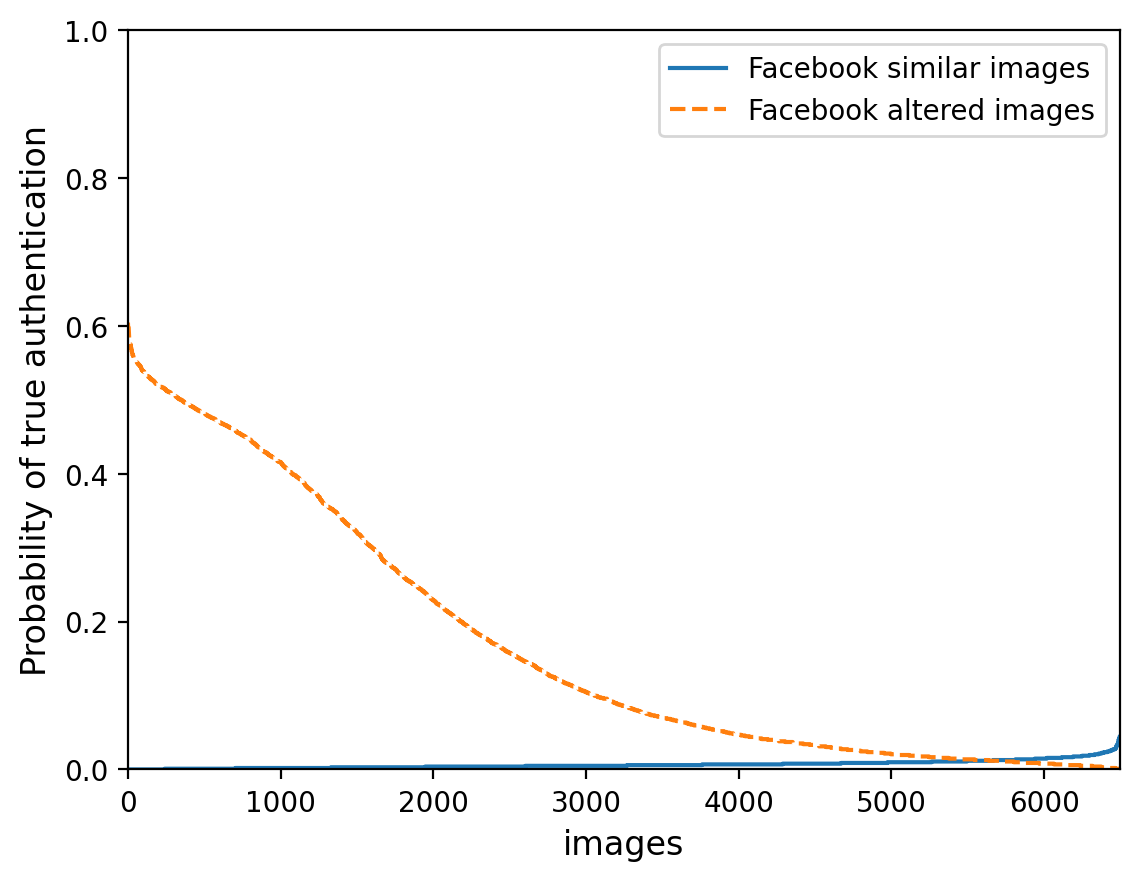

In [417]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 19 00:53:17 2021

@author: Mohammed-Abdulaziz
"""

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import  LineString

file1 = open("cifar100_trained_facebook_no_alter.txt", "r")
content1= [line.split(',') for line in file1.readlines()]
content2=content1[0]
content3=sorted(content2[:-1], key = lambda x:float(x))

for i in range(0, len(content3)):
    content3[i] = float(content3[i])

content3= content3[:6497]
#content3= content3[:6464]

file2 = open("cifar100_trained_facebook_alter.txt", "r")
contentt1= [line.split(',') for line in file2.readlines()]
contentt2=contentt1[0]
contentt3=sorted(contentt2[:-1], key = lambda x:float(x), reverse=True)

for ii in range(0, len(contentt3)):
    contentt3[ii] = float(contentt3[ii])
 
contentt3= contentt3[:6497]

x1 = np.arange(0, 6497, 1).tolist()


plt.plot(x1, content3, label = "Facebook similar images", linestyle="-")

plt.plot(x1, contentt3, label = "Facebook altered images", linestyle="--")


average = 0 if len(content3) == 0 else np.sum(content3)/len(content3)

print("twitter similar rpivd")
print("----------")
print("min org_VS_twitterNoalter: ", + min(content3))
print("avg org_VS_twitterNoalter: ", + average)
print("max org_VS_twitterNoalter: ", + max(content3))

averagee = 0 if len(contentt3) == 0 else np.sum(contentt3)/len(contentt3)

print("----------")
print("min org_VS_twitteralter: ", + min(contentt3))
print("avg org_VS_twitteralter: ", + averagee)
print("max org_VS_twitteralter: ", + max(contentt3))
print("----------")


plt.xlim(0, 6496)
plt.ylim(0, 1)


# naming the x axis
plt.xlabel('images',fontsize=12)

# naming the y axis
plt.ylabel('Probability of true authentication',fontsize=12)


line_1 = LineString(np.column_stack((x1, content3)))
line_2 = LineString(np.column_stack((x1, contentt3)))
######

intersection = line_1.intersection(line_2)

print(intersection)

#plt.plot(*intersection.xy, 'ro')


#x,y = intersection.xy
#x,y
y=[0.04]
print ("New threshold: ",y[0])

#plt.text(4200, y[0]+0.001, y[0])
######

thresholdAltered=[]
thresholdNoAltered=[]

for cc in range(0, len(content3)):
    if content3[cc]<=y[0]:
        thresholdNoAltered.append(content3[cc])

        
for dd in range(0, len(contentt3)):
    if contentt3[dd]>y[0]:
        thresholdAltered.append(contentt3[dd])

len_noAl= len(thresholdNoAltered)
len_Alt= len(thresholdAltered)

print("thresholdNoAltered< ", y[0] ,": ", len_noAl)
print("thresholdAltered> ", y[0] , ": ", len_Alt)
"""
fNR= len_noAl/(len_noAl+(6496-len_Alt)+1e-8)
fPR= len_Alt/(len_Alt+(6496-len_noAl)+1e-8)
accuricy= (len_noAl+len_Alt)/12994

print("FNR: ", fPR)
print("FPR: ", fNR)
print("accuracy: ", (1-accuricy)*100)
"""

TP = 0
FP = 0
TN = 0
FN = 0

for l in range(len(content3)): 
    if content3[l]<=y[0]:
        TP += 1
    if content3[l]>y[0]:
        FN += 1
        
for ll in range(len(contentt3)):
    if contentt3[ll]>y[0]:
        TN += 1
    if contentt3[ll]<=y[0]:
        FP += 1

a= FP+FN
b= 0.5 * a

f_score = TP/(TP + b)

fNR_2= FN/(FN+TP)
fPR_2= FP/(FP+TN)
accuricy_2= (TP+TN)/(TP+FN+TN+FP)

print("FNR-2: ", fNR_2)
print("FPR-2: ", fPR_2)
print("accuracy-2: ", accuricy_2*100,"%")
print("F-score: ", f_score)


plt.legend()

plt.show()

#outcomes:
    #simCLR acc= 0.98075


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.9974


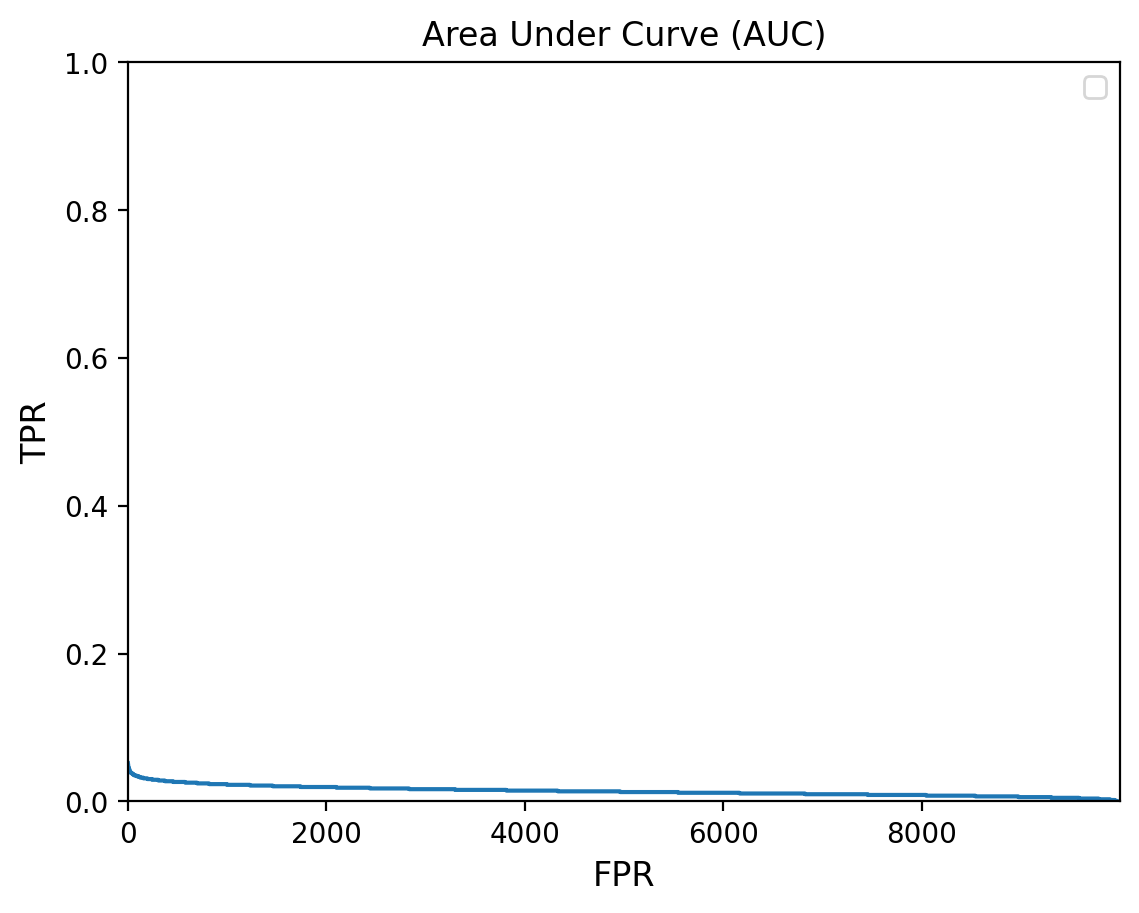

In [424]:

import matplotlib.pyplot as plt
import numpy as np
#from shapely import LineString


x1 = np.arange(0, 10000, 1).tolist()


file1 = open("cifar100_fgsm_Original_all_simCLR_jitter.txt", "r")
contentt1= [line.split(',') for line in file1.readlines()]
contentt2=contentt1[0]
contentt3=sorted(contentt2[:-1], key = lambda x:float(x), reverse=True)

TP = 0
for ii in range(0, len(contentt3)):
    contentt3[ii] = float(contentt3[ii])
    if contentt3[ii]<=0.04:
        TP += 1

print(TP/len(contentt3))

plt.plot(x1, contentt3, linestyle="-")
#plt.plot(x1, acc, label = "Healthcare", linestyle="--")
#plt.plot(x1, whole_top_c, label = "Detecting inappropriate content", linestyle=":")

plt.xlim(0, 9999)
plt.ylim(0, 1)

plt.title('Area Under Curve (AUC)')
# naming the x axis
plt.xlabel('FPR',fontsize=12)

# naming the y axis
plt.ylabel('TPR',fontsize=12)

plt.legend()
#plt.legend(loc='center right')

plt.show()


#the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.